<a href="https://colab.research.google.com/github/ChayapolNine/Diamond-Price-Prediction-Model/blob/main/Project_Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diamond Project**

# **1. Reading the data into python and data description**


#### About Dataset

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

info : https://www.kaggle.com/datasets/shivam2503/diamonds

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np

diamond_df=pd.read_csv('/content/drive/MyDrive/HW_ML/diamonds.csv', encoding='latin')
print('Shape before deleting duplicate values:', diamond_df.shape)

# Removing duplicate rows if any
diamond_df=diamond_df.drop_duplicates()
print('Shape After deleting duplicate values:', diamond_df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
diamond_df.head(10)

Shape before deleting duplicate values: (53940, 11)
Shape After deleting duplicate values: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# **2. Defining the problem statement**

Create a ML model which can predict the price of a diamond

* **Target Variable:** price
* **Predictors:** carat, cut, color, clarity, depth, table, price, x, y, z
* **Samples:**  54,000 diamonds from Tiffany & Co's snapshot pricelist from 2017.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a **supervised ML Regression model**, as the target variable is Continuous.


# **3. Looking at the distribution of Target**



count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

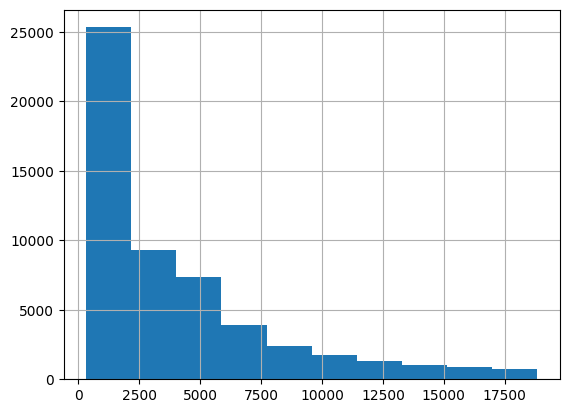

In [ ]:
# Creating histogram as the Target variable is Continuous
diamond_df['price'].hist()
diamond_df['price'].describe()

*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ price จะเห็นได้ว่ากราฟมีลักษณะเบ้ไปทางขวา (positive skewed) และไม่มี outlier ซึ่งมีค่า mean อยู่ที่ 3932.799722 USD

# **4. Basic data exploration**



In [ ]:
# Looking at sample rows in the data
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Looking at the number of rows and columns
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [ ]:
# Looking at the statistical aspects of the dataframe
diamond_df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [ ]:
# Looking unique values in each column
diamond_df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

**Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* Unnamed: 0 - Categorical(ordinal). Rejected -> Index of data
* carat - Continuous(numeric). Selected.
* cut - Categorical(ordinal). Selected.
* color - Categorical(ordinal). Selected.
* clarity - Categorical(ordinal). Selected.
* depth - Continuous(numeric). Selected.
* table - Continuous(numeric). Selected.
* x - Continuous(numeric). Selected.
* y - Continuous(numeric). Selected.
* z - Continuous(numeric). Selected.
* price - Continuous(numeric). Selected. This is the **Target Variable!**

**Summary:** No removing useless columns from the data.

In [ ]:
#drop unnamed column
diamond_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# **5.Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts) and feature selection based on data distribution**



## **5.1. Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

**Categorical Predictors:**

'cut', 'color', clarity

We use bar charts to see how the data is distributed for these categorical columns.

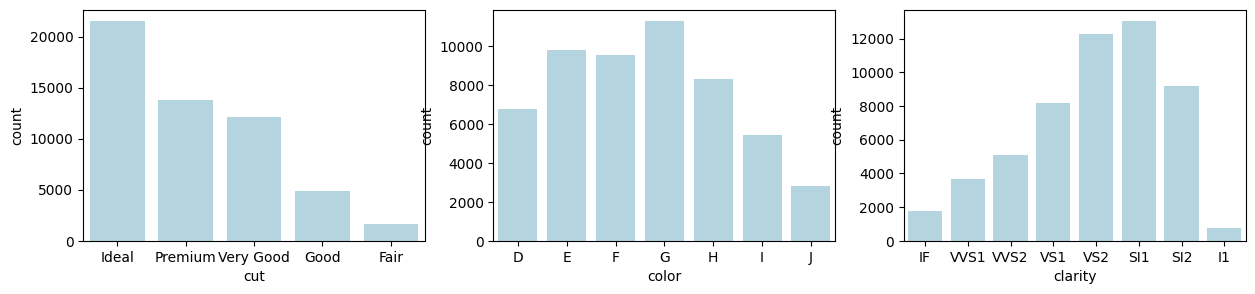

In [ ]:
#barplot for categorical data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 3))
plt.subplot(1,3,1)
sns.countplot(x='cut',data=diamond_df , order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'] , color='lightblue')
plt.subplot(1,3,2)
sns.countplot(x='color',data=diamond_df, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'] , color='lightblue')
plt.subplot(1,3,3)
sns.countplot(x='clarity',data=diamond_df , order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] , color='lightblue')
plt.show()

### **Bar Charts Interpretation**

**Interpretation**


`กราฟแสดง distribution ของ cut`
จากราฟบ่งบอกถึงปริมาณเพชรที่มีการตัดในแต่ละรูปแบบ เรียงลำดับเป็น Ideal(best) to Fair(worst)
โดยเพชรส่วนใหญ่จะมีการตัดแบบ Ideal cut มากที่สุด รองลงมาเป็นPremium, VeryGood, Good, และ Fair ตามลำดับ ซึ่งหมายความว่าเพชรส่วนใหญ่ที่ถูกตัดออกมาเป็นปริมาณมากมีคุณสมบัติสูง และมีส่วนน้อยที่ตัดออกมามีคุณสมบัติต่ำ

`กราฟแสดง distribution ของ color`
จากราฟบ่งบอกถึงปริมาณเพชรที่มีสีที่แตกต่างกัน เรียงลำดับ D(best) to J(worst) โดยเมื่อดูจากกราฟจะเห็นได้ว่าเพชรแต่ละสีมีปริมาณที่เฉลี่ยไล่เลี่ยกัน ยกเว้นเพชรที่มีค่าสี J มีปริมาณค่อนข้างน้อยเมื่อเทีบบกับสีอื่นๆ

`กราฟแสดง distribution ของ clarity`
จากกราฟบ่งบอกถึงปริมาณเพชรที่มีความบริสุทธิ์ที่แตกต่างกัน  โดยเรียงลำดับเป็น  I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) เมื่อดูจากกราฟจะเห็นได้ว่า เพชรระดับ IF, VVS1 และ VVS2 นั้นมีจำนวนน้อยกว่า เมื่อเทียบกับเพชรที่มีความความบริสุทธิ์รองลงมา VS1,VS2,SI1,SI2 ซึ่งจะเห็นได้ว่าเพชรที่มีความบริสุทธิ์มากจะมีปริมาณน้อยกว่าเพชรที่มีความบริสุทธิ์น้อย ยกเว้น เพชรที่มีความบริสุทธิ I1 ที่มีความความบริสุทธิ์ต่ำ และมีปริมาณน้อยอีกด้วย


**Selected Categorical Variables:**
* **'cut':** Selected
* **'color':** Selected
* **'clarity':** Selected



## **5.2. Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Data Exploration, there are eleven continuous predictor variables 'carat', 'dept', 'table', 'x', 'y', 'z'

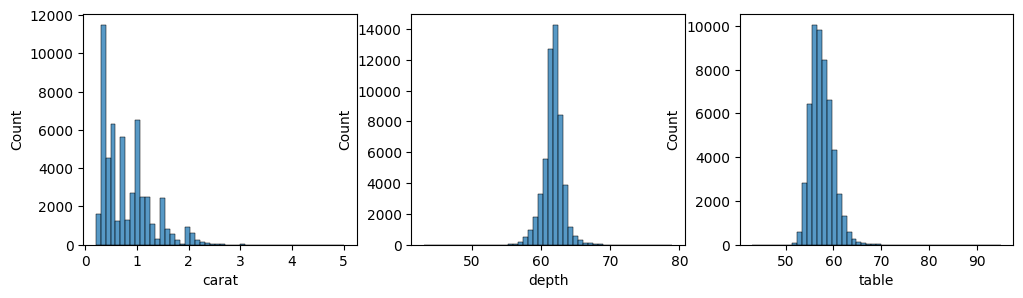

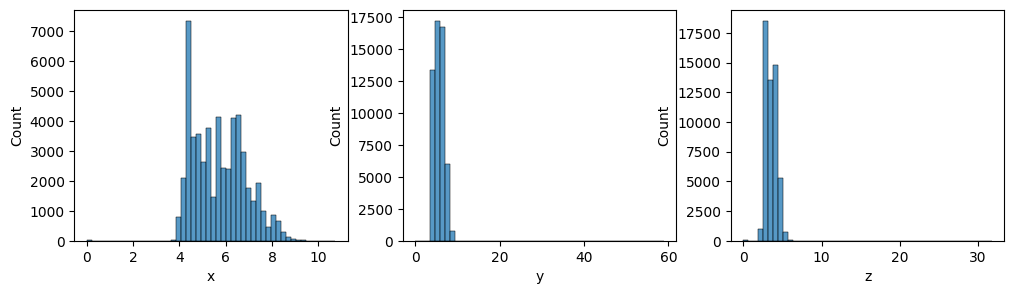

In [ ]:
#hist plot for continuous data subplots 2,3 space between plots
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.histplot(diamond_df['carat'],bins=50)
plt.subplot(1,3,2)
sns.histplot(diamond_df['depth'],bins=50)
plt.subplot(1,3,3)
sns.histplot(diamond_df['table'],bins=50)
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.histplot(diamond_df['x'],bins=50)
plt.subplot(1,3,2)
sns.histplot(diamond_df['y'],bins=50)
plt.subplot(1,3,3)
sns.histplot(diamond_df['z'],bins=50)
plt.show()




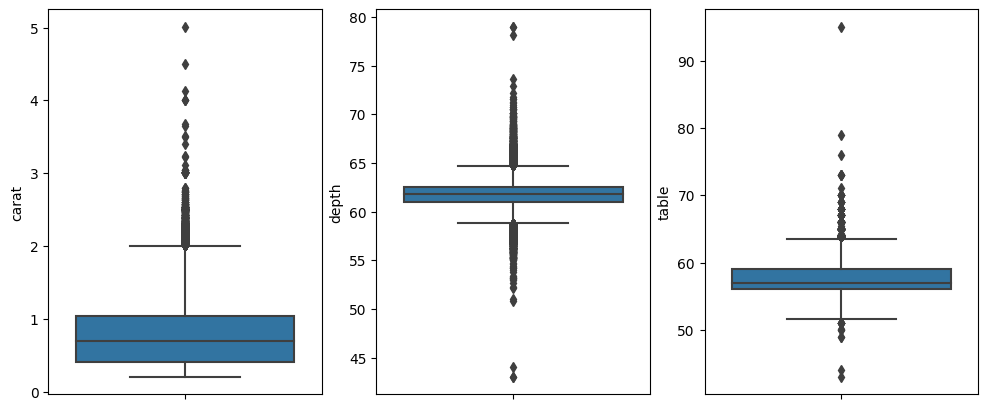

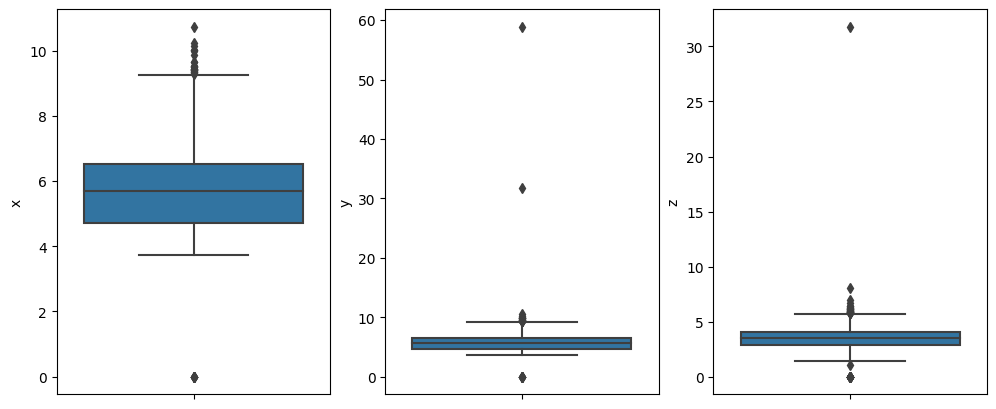

In [ ]:
#boxplot for continuous data subplots 2,3 space between plots
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(y=diamond_df['carat'])
plt.subplot(1,3,2)
sns.boxplot(y=diamond_df['depth'])
plt.subplot(1,3,3)
sns.boxplot(y=diamond_df['table'])
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(y=diamond_df['x'])
plt.subplot(1,3,2)
sns.boxplot(y=diamond_df['y'])
plt.subplot(1,3,3)
sns.boxplot(y=diamond_df['z'])
plt.show()

**Interpretation**

**carat**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ carat จะเห็นได้ว่ากราฟมีลักษณะเบ้ไปทางขวา (positive skewed)
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า 2 - 4 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 4 ไม่มีการกระจุกตัวกันมาก จึงมองว่าเป็น outlier

**depth**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ depth จะเห็นได้ว่ากราฟมีลักษณะเป็น Normal distribution
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า ช่วง 65 ถึง 75 และ ช่วง 58 ถึง 50 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 75 และ น้อยกว่า 45 ไม่มีการกระจุกตัวกันมาก จึงมองว่าเป็น outlier

**table**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ table จะเห็นได้ว่ากราฟมีลักษณะเป็น Normal distribution
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า ช่วง 63 ถึง 70 และ ช่วง 49 ถึง 52 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 73 และ น้อยกว่า 45 ไม่มีการกระจุกตัวกันมาก จึงมองว่าเป็น outlier

**x**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ x จะเห็นได้ว่ากราฟมีลักษณะเบ้ไปทางขวาขวา (positive skewed)
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า ช่วง 9 ถึง 11 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 11 ไม่มีการกระจุกตัวกันมาก จึงมองว่าเป็น outlier และ ค่า x ที่เท่ากับ 0 ซึ่งไม่เป็นไปไม่ได้ที่ค่าความยาวจะเท่ากับ 0 จึงตัดออก

**y**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ y จะเห็นได้ว่ากราฟมีลักษณะเบ้ไปทางขวาขวา (positive skewed)
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า ช่วง 10 ถึง 15 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 30 ไม่มีการกระจุกตัวกันมาก จึงมองว่า outlier และ ค่า y ที่เท่ากับ 0 ซึ่งไม่เป็นไปไม่ได้ที่ค่าความกว้างจะเท่ากับ 0 จึงตัดออก

**z**
*   เมื่อพิจารณาจากกราฟ histogram จากข้อมูลของ x จะเห็นได้ว่ากราฟมีลักษณะเบ้ไปทางขวาขวา (positive skewed)
*   เมื่อดูจาก boxplot พบว่ามีข้อมูลที่เป็น outlier โดยพิจารณาจากค่าที่มากกว่า 3 IQR
  *  มีการกระจุกตัวกันมากที่บริเวณค่า ช่วง 6 ถึง 7 แะล ช่วง 4 ถึง 2 ซึ่งอาจเป็น Characteristics จึงสรุปได้ว่าข้อมูลจากราฟไม่ใช่ outlier
  * ถ้า carat ที่มากกว่า 7 และ น้อยกว่า 2 ไม่มีการกระจุกตัวกันมาก จึงมองว่า outlier และ ค่าที่ z เท่ากับ 0 ซึ่งไม่เป็นไปไม่ได้ที่ค่าความลึกจะเท่ากับ 0 จึงตัดออก

**Selected Continuous Variables:**

* **carat :** Selected. Strongly positive skewed distribution, acceptable. Outliers seen, need to treat them.
* **depth :**Selected. The distribution is good. (Normal) , acceptable. Outliers seen, need to treat them.
* **table :** Selected. The distribution is good. (Normal) , acceptable. Outliers seen, need to treat them.
* **x :** Strongly positive skewed distribution, acceptable. Outliers seen, need to treat them.
* **y :** Strongly positive skewed distribution, acceptable. Outliers seen, need to treat them.
* **z :** Strongly positive skewed distribution, acceptable. Outliers seen, need to treat them.

# **6. Outlier treatment**

* Delete the outlier Records. Only if there are just few rows lost.


In [ ]:
#removing outliers carat > 4
diamond_df=diamond_df[diamond_df['carat']<4]

#removing outliers depth > 75 and < 45
diamond_df=diamond_df[diamond_df['depth']<75]
diamond_df=diamond_df[diamond_df['depth']>45]

#removing outliers table > 90 and < 45
diamond_df=diamond_df[diamond_df['table']<73]
diamond_df=diamond_df[diamond_df['table']>45]


#removing outliers x > 11 and < 3
diamond_df=diamond_df[diamond_df['x']<11]
diamond_df=diamond_df[diamond_df['x']>3]

#removing outliers y > 30 and < 1
diamond_df=diamond_df[diamond_df['y']<30]
diamond_df=diamond_df[diamond_df['y']>1]

#removing outliers z > 7 and < 1
diamond_df=diamond_df[diamond_df['z']<7]
diamond_df=diamond_df[diamond_df['z']>2]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

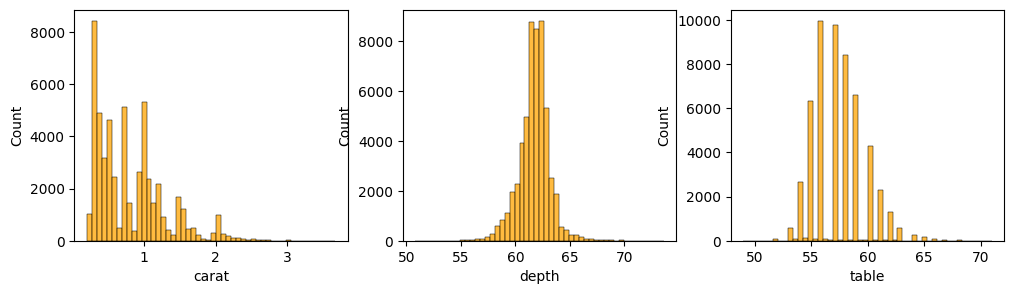

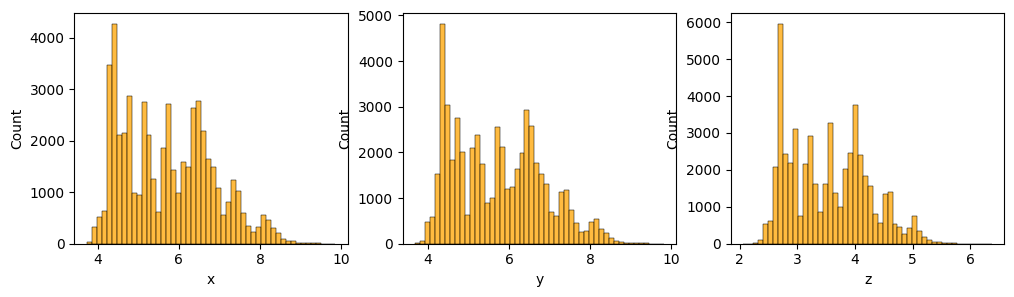

In [ ]:
#hist plot for continuous data subplots 2,3 space between plots
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.histplot(diamond_df['carat'],bins=50, color='orange')
plt.subplot(1,3,2)
sns.histplot(diamond_df['depth'],bins=50, color='orange')
plt.subplot(1,3,3)
sns.histplot(diamond_df['table'],bins=50, color='orange')
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.histplot(diamond_df['x'],bins=50, color='orange')
plt.subplot(1,3,2)
sns.histplot(diamond_df['y'],bins=50, color='orange')
plt.subplot(1,3,3)
sns.histplot(diamond_df['z'],bins=50, color='orange')
plt.show()


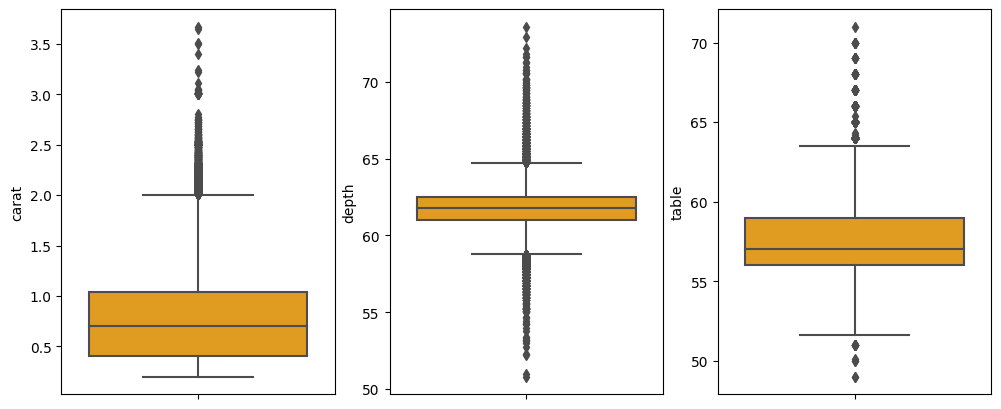

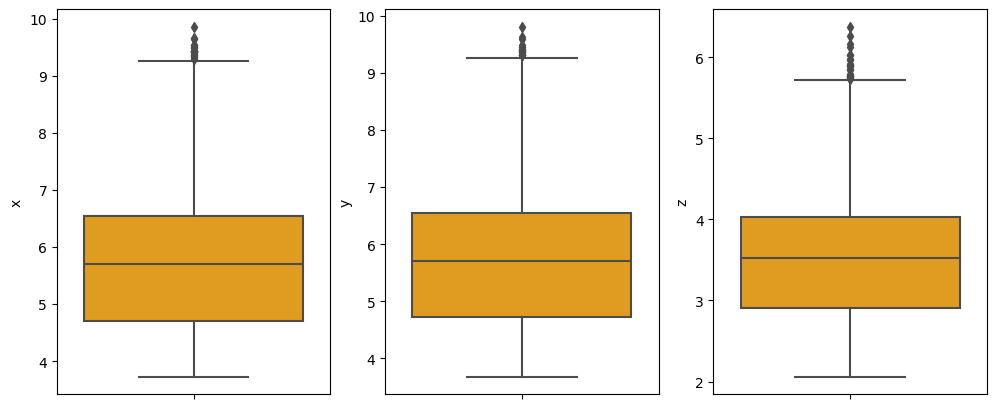

In [ ]:
#boxplot for continuous data subplots 2,3 space between plots
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(y=diamond_df['carat'], color='orange')
plt.subplot(1,3,2)
sns.boxplot(y=diamond_df['depth'], color='orange')
plt.subplot(1,3,3)
sns.boxplot(y=diamond_df['table'], color='orange')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(y=diamond_df['x'], color='orange')
plt.subplot(1,3,2)
sns.boxplot(y=diamond_df['y'], color='orange')
plt.subplot(1,3,3)
sns.boxplot(y=diamond_df['z'], color='orange')
plt.show()

# **7. Missing values treatment**



In [ ]:
# Finding how many missing values are there for each column
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No missing values in this data!!

# **8. Feature selection by Visual correlation analysis and Statistical measurement**



* Continuous Target Variable Vs Continuous Predictor -> Scatter Plot, Correlation matrix
* Continuous Target Variable Vs Categorical Predictor -> Box Plot, ANOVA test

## **8.1 Relationship exploration: Continuous Vs Continuous -- Scatter Charts**





### **8.1.1 Visual exploration**

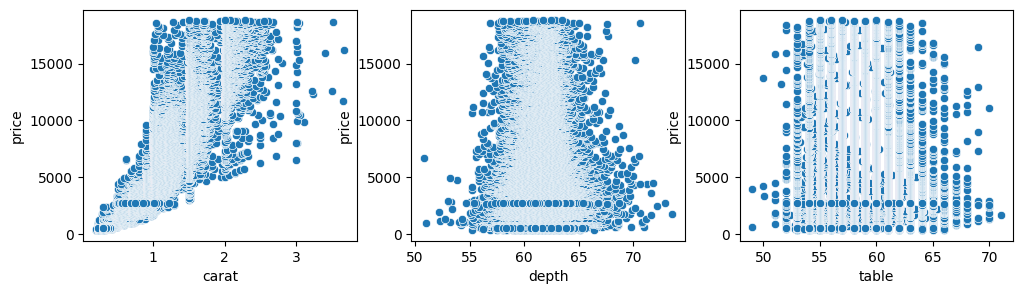

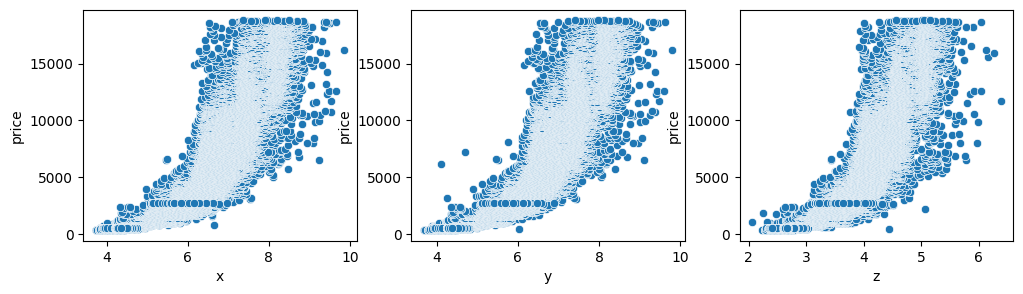

In [ ]:
#scatter plot for continuous data vs target variable
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.scatterplot(x='carat',y='price',data=diamond_df)
plt.subplot(1,3,2)
sns.scatterplot(x='depth',y='price',data=diamond_df)
plt.subplot(1,3,3)
sns.scatterplot(x='table',y='price',data=diamond_df)
plt.show()

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
sns.scatterplot(x='x',y='price',data=diamond_df)
plt.subplot(1,3,2)
sns.scatterplot(x='y',y='price',data=diamond_df)
plt.subplot(1,3,3)
sns.scatterplot(x='z',y='price',data=diamond_df)
plt.show()

**Interpretation**

นำข้อมูลใน Dataframe มาทำการ visualization เพื่อหาดูความสัมพันธ์ระหว่าง Feature กับ Target

**carat vs price**


*   เมื่อน้ำหนัก (carat) มีค่ามากจะส่งผลให้ราคา (price) สูงขึ้นตามเป็น Increasing Trend อย่างชัดเจน สรุปได้ว่า น้ำหนัก (carat) เป็น feature ที่**มีความสัมพันธ์กับ target**



**depth vs price**


*   เมื่อ ความลึก (depth) เพิ่มมากขึ้นหรือลดน้อยลงไม่ได้มีการส่งผลต่อการเปลี่ยนแปลงของ ราคา (price)หรือ เปลี่ยนแปลง ราคา (price) น้อยมากๆ สรุปได้ว่า ความลึก (depth) เป็น feature ที่**ไม่มีความสัมพันธ์กับ target**


**table vs price**


*   เมื่อ หน้าเพชร (table) เพิ่มมากขึ้นหรือลดน้อยลงไม่ได้มีการส่งผลต่อการเปลี่ยนแปลงของ ราคา (price)หรือ เปลี่ยนแปลง ราคา (price) น้อยมากๆ สรุปได้ว่า หน้าเพชร (table)  เป็น feature ที่**ไม่มีความสัมพันธ์กับ target**


**x vs price**


*   เมื่อความยาว x (length) มีค่ามากจะส่งผลให้ราคา (price) สูงขึ้นตามเป็น Increasing Trend อย่างชัดเจน สรุปได้ว่า ความยาว x (length) เป็น feature ที่**มีความสัมพันธ์กับ target**


**y vs price**


*   เมื่อความกว้าง y (width) มีค่ามากจะส่งผลให้ราคา (price) สูงขึ้นตามเป็น Increasing Trend อย่างชัดเจน สรุปได้ว่า ความกว้าง y (width) เป็น feature ที่**มีความสัมพันธ์กับ target**


**z vs price**


*   เมื่อความลึก z (depth) มีค่ามากจะส่งผลให้ราคา (price) สูงขึ้นตามเป็น Increasing Trend อย่างชัดเจน สรุปได้ว่า y (width) เป็น feature ที่**มีความสัมพันธ์กับ target**



**Selected Continuous Variables:**

* **carat :** Selected. Strongly increasing Trend.
* **depth :** Not selected. No Trend.
* **table :** Not selected. No Trend.
* **x :** Selected. Strongly increasing Trend.
* **y :** Selected. Strongly increasing Trend.
* **z :** Selected. Strongly increasing Trend.

### **8.1.2 Statistical Feature Selection**

<Axes: >

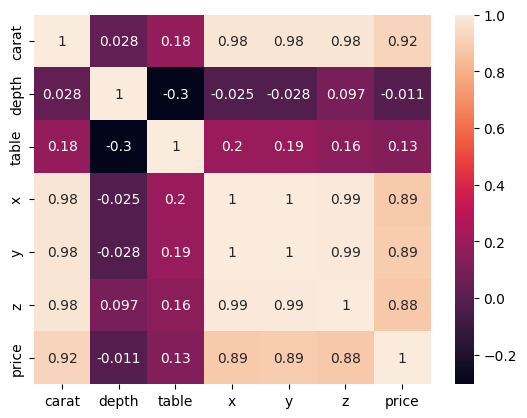

In [ ]:
#correlation matrix continuous variables.
continue_value = diamond_df[['carat','depth','table','x','y','z','price']]
corrMatrix = continue_value.corr()
sns.heatmap(corrMatrix, annot=True)

**correlation matrix**




*   จาก corrlation matix จะเห็นได้ว่า feature ที่มีความสัมพันธ์กับ target (price) มีค่า corrlation สูงได้แก่ feature x, y, z และ carat ซึ่งเป็นไปตามผลที่ visualization
*   **DOUBT** corrlation ค่า correlate ของ x,y,z ให้ความสัมพันธ์ไปในทิศทางเดียวจึงนำไปพิจารณาต่อว่า x,y,z เพื่อดูว่าค่าเหล่านี้ให้ความหมายของราคาแบบเดียวกันหรือไม่เพื่อลดความซับซ้อนของ model




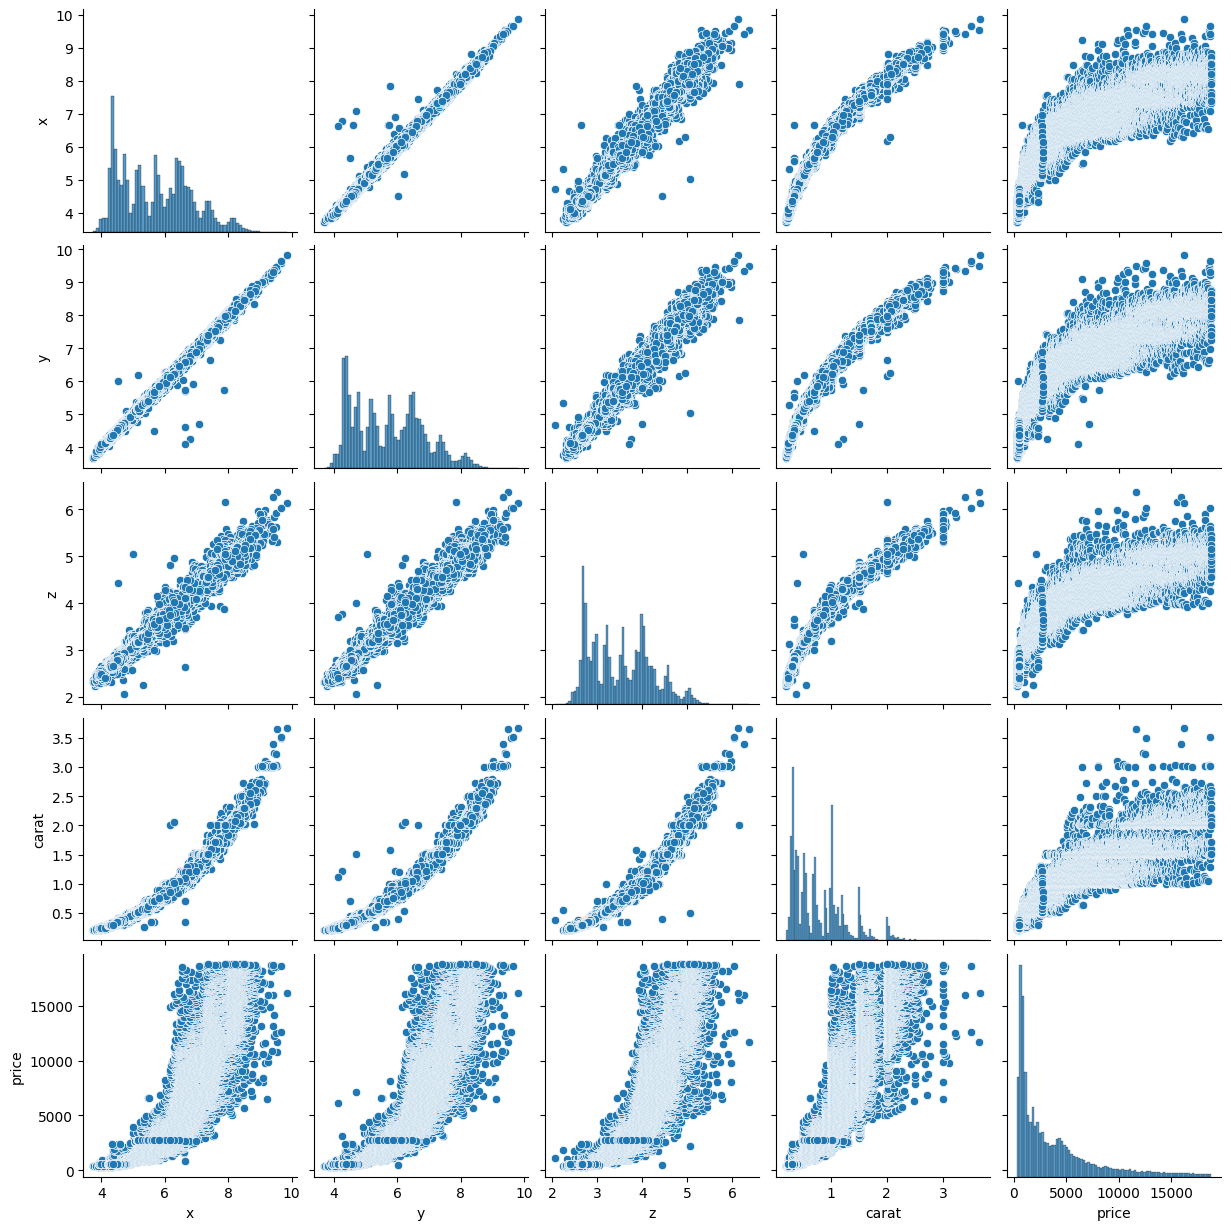

In [ ]:
#pairplot for x,y,z,carat
sns.pairplot(diamond_df[['x','y','z','carat','price']])

**Interpretation**

**pair plot** พิจารณาต่อว่า x,y,z ให้ความหมายของราคาแบบเดียวกันหรือไม่

* จากกราฟ pair plot จะเห็นได้ว่า x , y , z มีข้อมูลได้ลักษณะเป็น Trend Linear เหมือนกัน สามารถให้ความหมายกับ target แบบเดียวกันได้ ดังนั้นเราควรเลือกใช้ feature ใด feature นึงเพื่อลดความซับซ้อนของ model

* **แต่ค่า x, y, และ z มีกราฟลักษณะ linear เนื่องจาก characteristic ของเพชร**จะมีความกว้างและความยาวใกล้เคียงกันมากหากเป็นเพชรรูปทรง round จะเห็นได้ว่าเพชรส่วนใหญ่ในข้อมูลชุดนี้เป็นเพชรแบบ round และมีบ้างส่วนที่ ค่า x, y, และ z มีค่าไม่เป็น linear เนื่องจากเป็นเพชรรูปทรงอื่นจำพวก  Oval  Pear ซึ่งเป็นส่วนน้อย การมีค่า x,y,z อาจทำให้ model มีประสิทธิภาพมากกว่าการตัดทิ้ง


**สมมติฐานให้  model มีค่า x,y,z สามารถทำให้ model มีความแม่นยำมากกว่า model ที่เลือก x เพียง feature เดียว เนื่องจากการมี ค่า x,y,z ทำให้ model สามารถทำนายราคาของเพชรที่มีรูปร่างซับซ้อนได้ดีกว่า**

**Final selected Continuous columns from Visual exploration and Statistical Feature Selection:**

'carat', 'x','y','z'

## **8.2 Relationship exploration: Categorical Vs Continuous -- Box Plots**


### **8.2.1 Visual exploration**

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test.

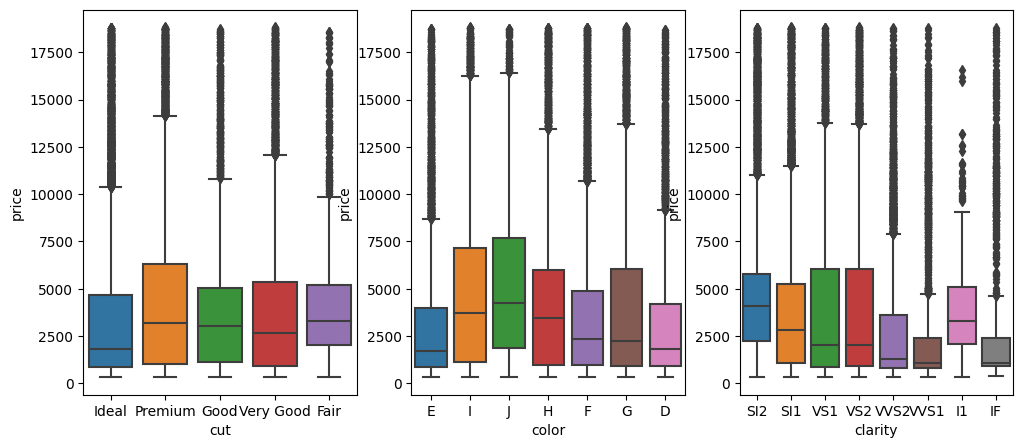

In [ ]:
#boxplot for categorical data vs target variable
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(x='cut',y='price',data=diamond_df)
plt.subplot(1,3,2)
sns.boxplot(x='color',y='price',data=diamond_df)
plt.subplot(1,3,3)
sns.boxplot(x='clarity',y='price',data=diamond_df)
plt.show()

#### **Box-Plots interpretation**

**cut vs price**

จากกราฟประเภทการตัด(cut) vs ราคา(price)แสดงให้เห็นว่า การตัดแต่ละประเภท ส่งผลให้ราคาของเพชร ที่ได้ มีราคาแตกต่างกันเล็กน้อย เห็นได้จาก จากกราฟ box plot ที่ค่า medium ของการตัดแต่ละประเภท มีค่าใกล้เคียงกัน เมื่อนำไปเข้า model อาจทำให้ส่งผลต่อประสิทธิภาพในการทำนาย

**colo vs pricer**

จากกราฟประเภทของสี(color) vs ราคา(price)แสดงให้เห็นว่า สีของเพชร มีผลต่อราคาดูได้จากค่า medium ที่แยกอย่างชัดเจน ยกเว้น F,G

**clarity vs price**

จากกราฟความบริสุทธิ์(clarity) vs ราคา(price)แสดงให้เห็นว่า สีของเพชร มีผลต่อราคาดูได้จากค่า medium ที่แยกอย่างชัดเจน ยกเว้น VS1,VS2

**Selected Categorical Variables:**

* **cut :** Selected. The boxes are closly in the same line. **(Doubt)**
* **color :** Selected. The boxes are NOT in the same line especially in E
* **clarity :** Selected. The boxes are NOT in the same line especially in SI2

### **8.2.2 Statistical Feature Selection**


In [ ]:
from scipy.stats import f_oneway
from sklearn.preprocessing import OrdinalEncoder

categorical_attributes = ['cut', 'color', 'clarity']
od = OrdinalEncoder()

for i in categorical_attributes:
    numerical_i = od.fit_transform(diamond_df[i].values.reshape(-1, 1))
    f, p = f_oneway(numerical_i.flatten(), diamond_df['price'])
    print('ANOVA test for', i, 'is correlated with price')
    print('F statistic =', f)
    print('p-value =', p,'\n')

ANOVA test for cut is correlated with price
F statistic = 52324.10915147846
p-value = 0.0 

ANOVA test for color is correlated with price
F statistic = 52323.03502530711
p-value = 0.0 

ANOVA test for clarity is correlated with price
F statistic = 52289.93351963228
p-value = 0.0 



**Final selected Continuous columns from Visual exploration and Statistical Feature Selection:**


## **Selected Categorical Variables:**


* **cut (Selected)** Visualization shows that cut does slight affect price, but statistical analysis suggests otherwise. The statistical feature selection p-value is 0 and the F statistic is high, suggesting that cut is a significant predictor of price.
* **color (Selected)** Visualization shows that color does not affect price, and statistical analysis suggests the same. The statistical feature selection p-value is 0 and the F statistic is high, suggesting that color is a significant predictor of price.
* **clarity (Selected)** Visualization shows that clarity does not affect price, and statistical analysis suggests the same. The statistical feature selection p-value is 0 and the F statistic is high, suggesting that clarity is a significant predictor of price.


## **Selected Continuous Variables:**

**Selected Continuous Variables:**

* **carat :** **Selected.** Strongly increasing Trend and High correlate value.
* **depth :** **Not selected.** No Trend and Low correlate value.
* **table :** **Not selected.** No Trend and Low correlate value.
* **x :** **Selected.** Strongly increasing Trend and High correlate value.
* **y :** **Selected.** Strongly increasing Trend and High correlate value.
* **z :** **Selected.**Strongly increasing Trend and High correlate value.


# **9. Selecting final predictors for Machine Learning summary**

In [ ]:
SelectedColumns=['carat','cut' , 'color', 'clarity', 'x','y', 'z', 'price']

# Selecting final columns
DataForML=diamond_df[SelectedColumns]
DataForML.head()

,carat,cut,color,clarity,x,y,z,price
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,4.34,4.35,2.75,335


# **10. Data Pre-processing for Machine Learning**

##**10.1 Converting the ordinal variable to numeric**

**interpretation**

* Feature แบบ ordinal ได้แก่ color, clarity แปลงให้เป็น numeric โดยใช้ OrdinalEncoder() ซึ่งเป็นการแปลง Feature ที่มีการไล่ลำดับ ให้เป็นตัวเลขที่มีการเพิ่มขึ้นตามลำดับของ  Feature เพื่อให้ Model สามารถทำนาย Data ได้อย่างถูกต้อง และแม่นยำมากขึ้น

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# encoding the categorical variables using OrdinalEncoder()
#color from J (worst) to D (best)
#clarity from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
oe = OrdinalEncoder(categories=[['D', 'E', 'F', 'G', 'H', 'I', 'J'],['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],['Fair','Good','Very Good','Premium','Ideal']])
DataForML[['color','clarity','cut']]=oe.fit_transform(DataForML[['color','clarity','cut']])
DataForML.head()

DataForML_Numeric = DataForML.copy()

# Adding Target Variable to the data
DataForML_Numeric['price']=diamond_df['price']

# Printing sample rows
DataForML_Numeric.head()

<ipython-input-22-ef3721eb56da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML[['color','clarity','cut']]=oe.fit_transform(DataForML[['color','clarity','cut']])


,carat,cut,color,clarity,x,y,z,price
0,0.23,4.0,1.0,1.0,3.95,3.98,2.43,326
1,0.21,3.0,1.0,2.0,3.89,3.84,2.31,326
2,0.23,1.0,1.0,4.0,4.05,4.07,2.31,327
3,0.29,3.0,5.0,3.0,4.20,4.23,2.63,334
4,0.31,1.0,6.0,1.0,4.34,4.35,2.75,335


## **10.2 Data Transformation**

* กำหนด Target และ Feature ที่จะนำมาใช้ในการทำนาย

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'price'], dtype='object')

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat','cut', 'color', 'clarity', 'x','y', 'z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
print("Example After Standardization\n")
X[1:6]

Example After Standardization



array([[0.21, 3.  , 1.  , 2.  , 3.89, 3.84, 2.31],
       [0.23, 1.  , 1.  , 4.  , 4.05, 4.07, 2.31],
       [0.29, 3.  , 5.  , 3.  , 4.2 , 4.23, 2.63],
       [0.31, 1.  , 6.  , 1.  , 4.34, 4.35, 2.75],
       [0.24, 2.  , 6.  , 5.  , 3.94, 3.96, 2.48]])

**Standardization of data**

**interpretation**

* Standardization เป็นการปรับข้อมูลให้มี mean มีค่าเท่ากับ 0 และ standard deviation มีค่าเท่ากับ 1 ในแต่ละ Feature ซึ่งช่วยลดผลกระทบของข้อมูลที่แตกต่างกันในการคำนวณ และการทำนายของ Model

In [ ]:
# standardization of data using z-score method
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
print("Example After Standardization\n")
X[1:6]


Example After Standardization



array([[-1.24320661,  0.0852706 , -0.93688087, -0.63876046, -1.645977  ,
        -1.70467363, -1.77931352],
       [-1.20086659, -1.70710807, -0.93688087,  0.57564602, -1.50292559,
        -1.49753809, -1.77931352],
       [-1.07384652,  0.0852706 ,  1.41453806, -0.03155722, -1.3688149 ,
        -1.3534438 , -1.31607467],
       [-1.0315065 , -1.70710807,  2.0023928 , -1.2459637 , -1.24364493,
        -1.24537308, -1.1423601 ],
       [-1.17969658, -0.81091874,  2.0023928 ,  1.18284926, -1.60127343,
        -1.59660291, -1.53321788]])

**Splitting the data into Training and Testing sample**

**interpretation**

*   นำ Feature ได้แก่ carat, color, clarity, x, y, z และ Target คือ price มาแบ่งข้อมูลออกเป็น 2 ส่วน ได้แก่ ส่วน Train 70% และส่วน Test 30% เพื่อนำมาสร้าง Model

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37726, 7)
(37726,)
(16169, 7)
(16169,)


# **11. Model construction**

## **11.1 Multiple Linear Regression**  

**interpretation**

* นำ Feature และ Target มาสร้าง Model เพื่อดู Performance ในการทำนายของ Linear Regression Model

* หลังจากนั้นนำมาหา Linear Regression Model เนื่องจาก Target เป็น Continuous variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Or you can find best hyperparameters using GridSearchCV

# Printing all the parameters of Linear regression
print(RegModel)
print("*"*100)
print()

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)


# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=LREG.predict(X_train)
TrainingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TrainingDataResults[TargetVariable]=y_train
TrainingDataResults[('Predicted'+TargetVariable)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

from sklearn import metrics
# Measuring Goodness of fit in Training data by R square
print('R2 Value of training set:',metrics.r2_score(y_train, LREG.predict(X_train)))
print('R2 Value of testing set:',metrics.r2_score(y_test, LREG.predict(X_test)))

#Measuring Goodness of fit in Training data by MAPE
TrainingDataResults['APE']=100 * ((abs(TrainingDataResults['price']-TrainingDataResults['Predictedprice']))/TrainingDataResults['price'])
MAPE_training=np.mean(TrainingDataResults['APE'])
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE_teating=np.mean(TestingDataResults['APE'])
print('MAPE on training data:', MAPE_training)
print('MAPE on test data:', MAPE_teating)
print('Accuracy on training data:', 100-MAPE_training)
print('Accuracy on test data:', 100-MAPE_teating)

# create dataframe stroe model name prediction and data
model_data = TrainingDataResults[['price','Predictedprice']]

#rename column
model_data.rename(columns={'Predictedprice':'LinearRegression'}, inplace=True)

LinearRegression()
****************************************************************************************************

Training result prediction
      carat       cut     color   clarity         x         y         z  \
0  0.746774  0.085271 -1.524736 -0.638760  0.920008  0.862006  0.884310   
1 -0.735126  0.085271  1.414538  1.790053 -0.742965 -0.768061 -0.664645   
2 -0.883316  0.981460  0.238829  1.182849 -0.948601 -0.921161 -0.954169   
3 -1.010336  0.981460  0.238829  1.182849 -1.163179 -1.191338 -1.243694   
4  0.937305  0.981460  0.826683  0.575646  1.089881  1.024112  1.043548   

   price  Predictedprice  
0   6041          7027.0  
1   1013          1462.0  
2    929          1432.0  
3    936           960.0  
4   7743          7667.0  
****************************************************************************************************

Testing result prediction
      carat       cut     color   clarity         x         y         z  \
0 -1.031506  0.981460  0.238829  1.7

<ipython-input-28-71d79f58103c>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.rename(columns={'Predictedprice':'LinearRegression'}, inplace=True)


* จากค่าที่ทำนายได้เปรียบเทียบกับค่าจริงจะเห็นได้ว่ามีค่าแตกต่างกันไม่มาก ทั้ง Training และ Testing

* จาก Performance พบว่า Linear Regression มีค่า Accuracy ไม่ค่อยสูงมาก มีค่า R-Square ที่ค่อยข้างสูงถึง 0.9 แต่จาก Mean Absolute Percentage Error(MAPE) ก็ยังมีความคลาดเคลื่อนกับกับค่าจริงอยู่ 43 ค่า โดยประมาณ ซึ่งสามารถสรุปได้ว่า Linear Regression Model อาจจะยังไม่เหมาะกับการทำนาย Dataset นี้ และจะเห็นว่า Accuracy ของ Train กับ Test มีค่าใกล้เคียงกัน ซึ่งแปลว่า ไม่เกิดการ Overfit

* ซึ่งจะได้ค่า Coefficient(Theta) ในสมการ Linear Regression ดังต่อไปนี้

In [ ]:
#y = theta0 + theta1*x1 +theta2*x2+...+theta5*x5
print("Theta0: ",LREG.intercept_)
for i in range(len(Predictors)):
  print("Theta{} x {}: ".format(i+1,Predictors[i]),LREG.coef_[i])


Theta0:  3931.6778747290227
Theta1 x carat:  5369.109843193984
Theta2 x cut:  163.7000383950209
Theta3 x color:  -551.3377042570307
Theta4 x clarity:  812.0912184638255
Theta5 x x:  -2630.9620599789923
Theta6 x y:  2370.695374987771
Theta7 x z:  -986.8967565888595


* นำค่าที่ทำนายได้มา Plot กราฟเปรียบเทียบกับ Target ที่เกิดขึ้นจริง ซึ่งจากกราฟจะเห็นได้ว่าค่าที่ทำนายได้มีความคลาดเคลื่อนกับค่าจริงไม่มาก

<Axes: title={'center': 'Actual vs Predicted on training'}>

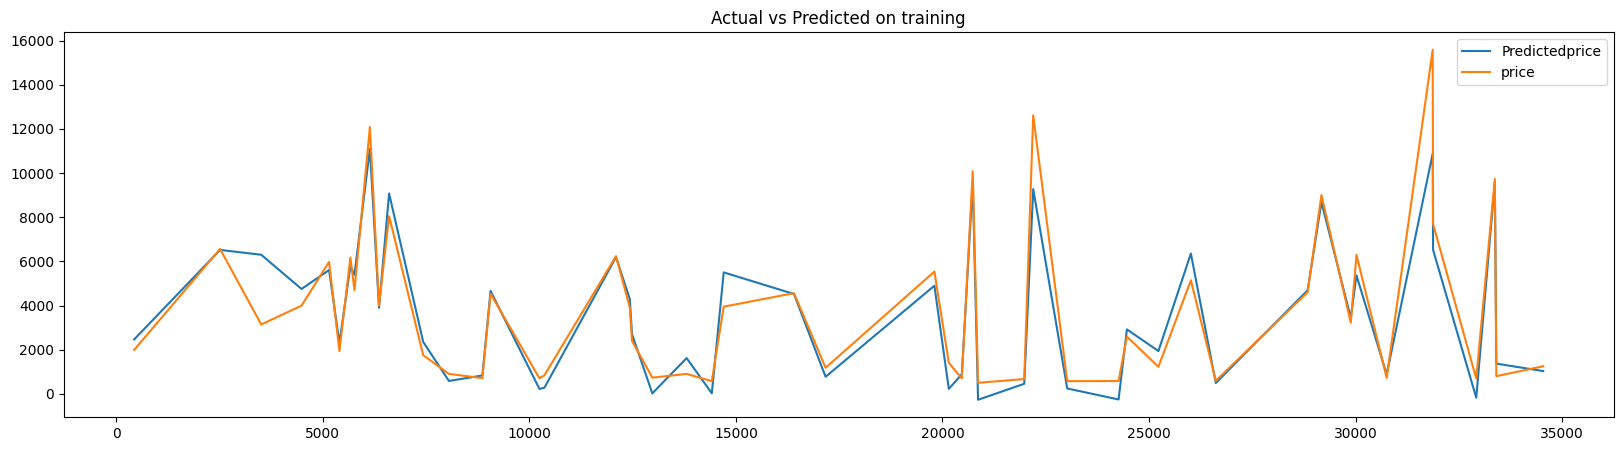

In [ ]:
random_data = TrainingDataResults[['Predictedprice','price']].sample(50)
random_data = random_data.sort_index()
random_data[['Predictedprice','price']].plot(kind="line", figsize=(20,5), title="Actual vs Predicted on training")

## **11.2 Decision Trees**

**interpretation**

* นำ Feature และ Target มาสร้าง Model เพื่อดู Performance ในการทำนายของ Decision Trees Model เปรียบเทียบกับการทำนายด้วย Linear Regression Model

* หลังจากนั้นนำมาหา Decision Trees Model เนื่องจาก Target เป็น Continuous variables โดยนำข้อมูล X_train และ y_train มาใช้ในการสร้าง Model และนำมา Test ด้วย X_test และ y_test

DecisionTreeRegressor(max_depth=12, max_features=17, min_samples_leaf=7,
                      min_samples_split=17)
****************************************************************************************************

Training result prediction
      carat       cut     color   clarity         x         y         z  \
0  0.746774  0.085271 -1.524736 -0.638760  0.920008  0.862006  0.884310   
1 -0.735126  0.085271  1.414538  1.790053 -0.742965 -0.768061 -0.664645   
2 -0.883316  0.981460  0.238829  1.182849 -0.948601 -0.921161 -0.954169   
3 -1.010336  0.981460  0.238829  1.182849 -1.163179 -1.191338 -1.243694   
4  0.937305  0.981460  0.826683  0.575646  1.089881  1.024112  1.043548   

   price  Predictedprice  
0   6041          6197.0  
1   1013          1078.0  
2    929           946.0  
3    936           935.0  
4   7743          8168.0  
****************************************************************************************************

Testing result prediction
      carat  

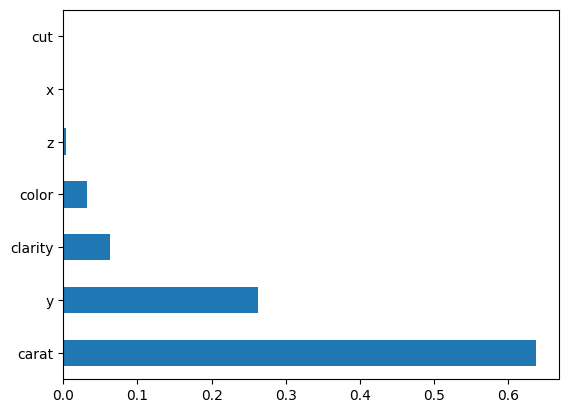

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth = 12, max_features = 17, min_samples_leaf = 7, min_samples_split = 17)
#find best hyperparameters using GridSearchCV

# Printing all the parameters of Decision Tree
print(RegModel)
print("*"*100)
print()

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=DT.predict(X_train)
TrainingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TrainingDataResults[TargetVariable]=y_train
TrainingDataResults[('Predicted'+TargetVariable)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DT.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

from sklearn import metrics
# Measuring Goodness of fit by R square
print('R2 Value of training set:',metrics.r2_score(y_train, DT.predict(X_train)))
print('R2 Value of testing set:',metrics.r2_score(y_test, DT.predict(X_test)))

#Measuring Goodness of fit by MAPE
TrainingDataResults['APE']=100 * ((abs(TrainingDataResults['price']-TrainingDataResults['Predictedprice']))/TrainingDataResults['price'])
MAPE_training=np.mean(TrainingDataResults['APE'])
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE_teating=np.mean(TestingDataResults['APE'])
print('MAPE on training data:', MAPE_training)
print('MAPE on test data:', MAPE_teating)
print('Accuracy on training data:', 100-MAPE_training)
print('Accuracy on test data:', 100-MAPE_teating)

model_data['DecisionTree']=TrainingDataResults['Predictedprice']

* จากค่าที่ทำนายได้เปรียบเทียบกับค่าจริงจะเห็นได้ว่ามีค่าแตกต่างกันค่อนข้างน้อย ทั้ง Training และ Testing

* จาก Performance ข้างต้น พบว่า Decision Trees มีค่า Accuracy และ R-Square ที่ค่อยข้างสูง รวมถึงค่า Mean Absolute Percentage Error(MAPE) ก็ค่อนข้างดี เพราะมีค่าคลาดเคลื่อนจากค่าจริงเพียงแค่ 7-8 ค่าเท่านั้น ซึ่งสามารถสรุปได้ว่า Decision Trees Model สามารถทำนาย Dataset นี้ได้ค่อนข้างดี และจะเห็นว่า Accuracy ของ Train กับ Test มีค่าใกล้เคียงกัน ซึ่งแปลว่า ไม่เกิดการ Overfit

* จากกราฟ Feature ที่ส่งผลต่อการทำนาย Data พบว่า Feature ที่ส่งผลต่อการทำนายมากที่สุด คือ Carat ซึ่ง Model จะเลือก Feature แต่ละ Feature มาทำนาย Target ดังแสดงใน Trees ด้านล่าง

In [ ]:
#Vitualization
from sklearn.tree import export_text
print(export_text(DT,feature_names=['carat','cut', 'color', 'clarity', 'x','y', 'z']))

|--- carat <= 0.42
|   |--- y <= -0.19
|   |   |--- y <= -0.66
|   |   |   |--- x <= -0.99
|   |   |   |   |--- clarity <= 1.49
|   |   |   |   |   |--- x <= -1.27
|   |   |   |   |   |   |--- x <= -1.40
|   |   |   |   |   |   |   |--- clarity <= 0.88
|   |   |   |   |   |   |   |   |--- z <= -1.61
|   |   |   |   |   |   |   |   |   |--- x <= -1.65
|   |   |   |   |   |   |   |   |   |   |--- value: [367.00]
|   |   |   |   |   |   |   |   |   |--- x >  -1.65
|   |   |   |   |   |   |   |   |   |   |--- cut <= -0.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- cut >  -0.36
|   |   |   |   |   |   |   |   |   |   |   |--- value: [410.12]
|   |   |   |   |   |   |   |   |--- z >  -1.61
|   |   |   |   |   |   |   |   |   |--- cut <= -0.36
|   |   |   |   |   |   |   |   |   |   |--- x <= -1.47
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |

* จาก Performance ที่เกิดขึ้นสามารถปรับปรุง Model ให้มีประสิทธิภาพดีมากยิ่งขึ้น โดยการหาค่า Hyperparameter ที่ทำให้ Model มีค่า Accuracy สูงขึ้น ได้แก่ max_depth, min_samples_leaf, min_samples_split และ max_features

In [ ]:
#find best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
TreeModel = DecisionTreeRegressor()
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(2, 20, 5),
    'min_samples_split': range(2, 20, 5),
    'max_features': range(2, 20, 5)
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = TreeModel, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
print("*"*100)
print()


Fitting 3 folds for each of 256 candidates, totalling 768 fits
We can get accuracy of 0.9754716616150771 using {'max_depth': 12, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 12}
****************************************************************************************************



* นำค่าที่ทำนายได้มา Plot กราฟเปรียบเทียบกับ Target ที่เกิดขึ้นจริง ซึ่งจากกราฟจะเห็นได้ว่าค่าที่ทำนายได้มีความคลาดเคลื่อนกับค่าจริงเล็กน้อย

<Axes: title={'center': 'Actual vs Predicted on training'}>

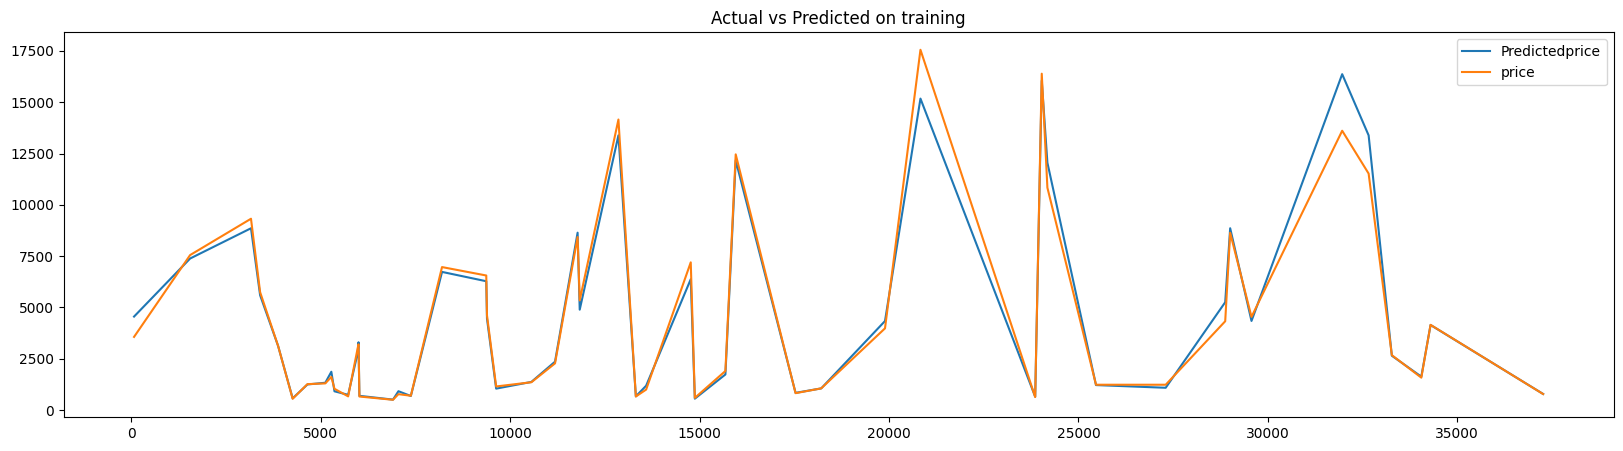

In [ ]:
random_data = TrainingDataResults[['Predictedprice','price']].sample(50)
random_data = random_data.sort_index()
random_data[['Predictedprice','price']].plot(kind="line", figsize=(20,5), title="Actual vs Predicted on training")

* เมื่อนำค่าที่ทำนายได้จากทั้ง 2 Model มา Plot เปรียบเทียบกับค่า Target จริง พบว่าค่าที่ทำนายได้จากทั้ง 2 Model มีความคลาดเคลื่อนจากค่าจริงค่อนข้างน้อย และเมื่อเปรียบเทียบกันจะเห็นได้ชัดว่าค่าที่ทำนายได้จาก Decision Trees Model(Green Line) มีค่าใกล้เคียงกับค่า Target จริงมากกว่าค่าจาก Linear Regression Model(Red Line)

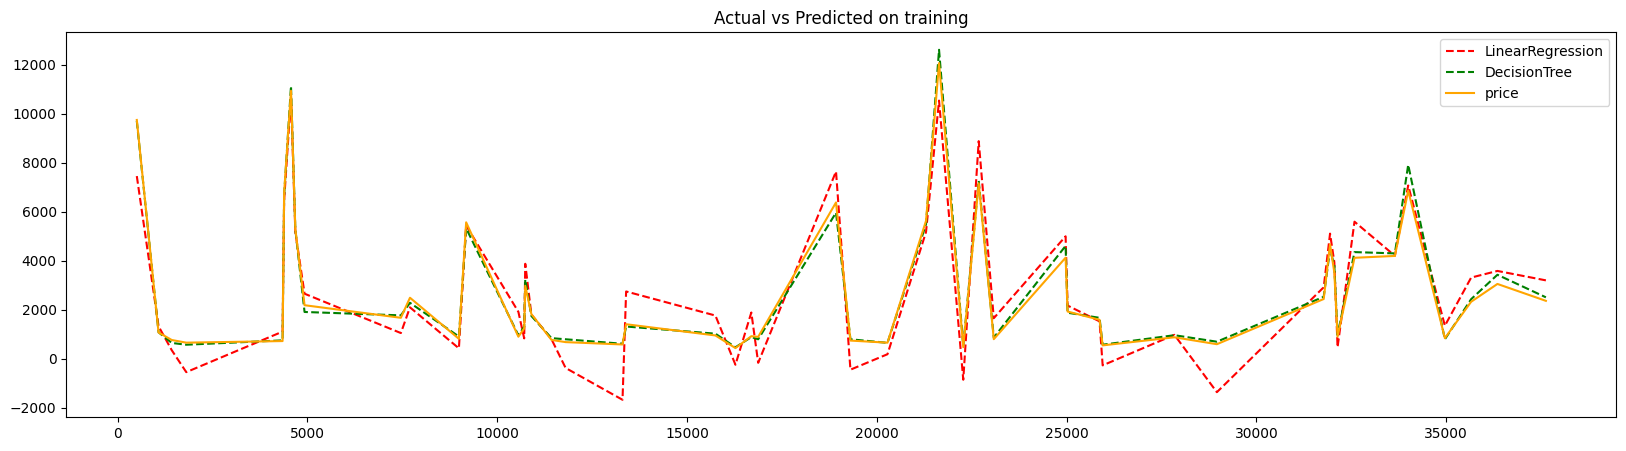

In [ ]:
# Select 50 random rows
random_data = model_data[['price','LinearRegression','DecisionTree']].sample(50)

# Sort the data by the index to make the line plot more readable
random_data = random_data.sort_index()

plt.figure(figsize=(20,5))

# Plot each line separately with different linewidth

plt.plot(random_data.index, random_data['LinearRegression'], '--', color='red', label='LinearRegression')
plt.plot(random_data.index, random_data['DecisionTree'], '--', color='green',  label='DecisionTree')
plt.plot(random_data.index, random_data['price'], color='orange',  label='price')

plt.title("Actual vs Predicted on training")
plt.legend()
plt.show()

* จากข้อสันนิษฐานทางสถิติที่ว่า Feature x, y, z มีความสัมพันธ์กันแบบ Linear จึงทดลองเลือกใช้ feature ใด feature หนึ่ง เพื่อลดความซับซ้อนของ Model ดังนั้นจึงเลือกนำค่า x เพียงค่าเดียวมาใช้ในการทำนาย เพื่อดู Performance ที่เกิดขึ้นว่าหากไม่มี Feature y และ z จะทำให้ Performance มีค่าลดลง หรือเพิ่มขึ้นหรือไม่

## **11.3 Prove Interchangeable uses of x, y, z by Decision Trees**

DecisionTreeRegressor(max_depth=12, max_features=7, min_samples_leaf=7,
                      min_samples_split=17)
****************************************************************************************************

Training result prediction
       carat  cut  color  clarity     x  price  Predictedprice
14998   1.15  3.0    0.0      2.0  6.76   6041          6621.0
38093   0.45  3.0    5.0      6.0  4.90   1013          1071.0
36164   0.38  4.0    3.0      5.0  4.67    929           942.0
36321   0.32  4.0    3.0      5.0  4.43    936           891.0
18883   1.24  4.0    4.0      4.0  6.95   7743          8023.0
****************************************************************************************************

Testing result prediction
       carat  cut  color  clarity     x  price  Predictedprice
32212   0.31  4.0    3.0      6.0  4.40    789           876.0
27658   2.01  1.0    3.0      2.0  8.07  18625         17689.0
42410   0.31  4.0    0.0      7.0  4.42   1310          1308

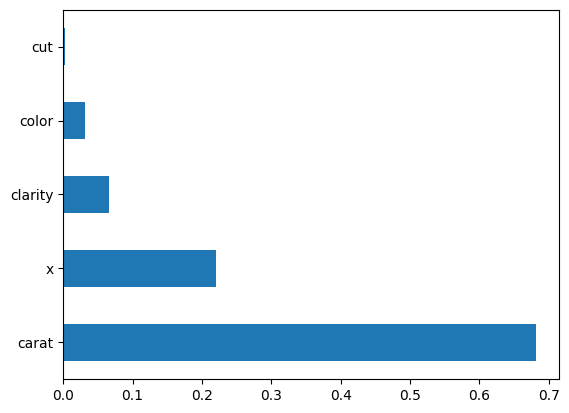

In [ ]:
Predictors = ['carat', 'cut','color', 'clarity', 'x']
TargetVariable='price'
X_train, X_test, y_train, y_test = train_test_split(DataForML_Numeric[Predictors], DataForML_Numeric[TargetVariable], test_size=0.3, random_state=42)


# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth = 12, max_features= 7, min_samples_leaf =7, min_samples_split =17)
#find best hyperparameters using GridSearchCV

# Printing all the parameters of Decision Tree
print(RegModel)
print("*"*100)
print()

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=DT.predict(X_train)
TrainingDataResults=pd.DataFrame(data=X_train, columns=Predictors)
TrainingDataResults[TargetVariable]=y_train
TrainingDataResults[('Predicted'+TargetVariable)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DT.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

from sklearn import metrics
# Measuring Goodness of fit by R square
print('R2 Value of training set:',metrics.r2_score(y_train, DT.predict(X_train)))
print('R2 Value of testing set:',metrics.r2_score(y_test, DT.predict(X_test)))

#Measuring Goodness of fit by MAPE
TrainingDataResults['APE']=100 * ((abs(TrainingDataResults['price']-TrainingDataResults['Predictedprice']))/TrainingDataResults['price'])
MAPE_training=np.mean(TrainingDataResults['APE'])
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE_teating=np.mean(TestingDataResults['APE'])
print('MAPE on training data:', MAPE_training)
print('MAPE on test data:', MAPE_teating)
print('Accuracy on training data:', 100-MAPE_training)
print('Accuracy on test data:', 100-MAPE_teating)

* จาก Performance ที่ได้ พบว่ามีค่า Accuracy ใกล้เคียงกันกับ Model ที่มีการใช้ Feature ทั้ง x, y, z จึงสามารถสรุปได้ว่า ทั้ง 3 Feature สามารถใช้ในการทำนายแทนกันได้ ซึ่งการเลือกใช้ feature ใด feature หนึ่ง จะลดความซับซ้อนของ Model ลงได้ ถึงแม้ทั้ง 3 Feature จะบ่งบอกถึง Characteristics ของเพชร แต่เนื่องจาก Sample ส่วนใหญ่เป็นเพชรรูปทรง round จึงทำให้ไม่ส่งผลกระทบต่อ Performance ในการทำนาย Data

# **12. Results Analysis**

*   จากผลการทำนายของทั้ง 3 model พบว่า Decision Trees Model สามารถทำนาย Dataset นี้ได้ดีกว่า Linear Regression Model เนื่องจาก Feature ที่นำมาใช้ ไม่ได้มีความสัมพันธ์กับ Target แบบ Linear มากนัก จึงทำให้การใช้ Linear Regression Model มีประสิทธิภาพน้อยกว่า Decision Trees Model ที่สามารถในการแบ่งช่วง Decision Boundary ได้หลายค่า

* แต่จาก Performance ที่เกิดขึ้นของ 3 Model ทั้ง Training และ Testing พบว่า Model ไม่มีการเกิด Overfitting หรือ Underfitting เนื่องจาก Linear Regression Model มีโครงสร้างไม่ซับซ้อนมาก และ Decision Trees Model มีการนำ Hyperparameter มาใช้ในการช่วยลดการเกิด Overfitting และเพิ่มความแม่นยำของ Model

* Feature ที่มีความสำคัญมากที่สุดในการทำนาย Dataset คือ Carat และ Feature x, y, z สามารถใช้ Feature ใด Feature หนึ่งในการทำนายได้ ไม่จำเป็นต้องใช้ทั้ง 3 Feature เพราะจะทำให้ Model มีความซับซ้อนเกินไป

*   โดยจาก Performance ของ Model ที่เกิดขึ้น หากวิเคราะห์ข้อผิดพลาดส่วนใหญ่ของ Linear Regression Model

  1. โครงสร้างของ Model มีข้อจำกัดในการทำนาย เหมาะสำหรับการทำนาย Model ที่ Feature มีความสัมพันธ์กับ Target แบบ Linear ซึ่งใน Dataset นี้ ไม่ค่อยมีความเป็น Linear มากนัก

*   ดังนั้นจึงสามารถสรุปได้ว่า Model ที่นำมาใช้ สามารถนำมาใช้ในการทำนายสถานการณ์จริงในการวิเคราะห์ราคาของเพชรรูปแบบ round ได้ดี แต่หากต้องการนำไปใช้ในการทำนายราคาเพชรรูปแบบอื่น ๆ ด้วย อาจจะต้องเพิ่ม Dataset ของเพชรรูปแบบอื่นให้มากขึ้น เพื่อให้ Model สามารถเรียนรู้ และประเมินราคาเพชรได้เหมาะสม และใกล้เคียงกับค่าจริงมากที่สุด

